We Will import the required libraries now

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
pd.set_option('display.max_columns',None) #To see all the columns 

In [50]:
data = pd.read_csv("bank.csv",sep=';') #Read the dataset

In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
#We will check the number of rows and columns of the dataset
print(f'Dataset consist of {data.shape[0]} number of rows')
print(f'Dataset consist of {data.shape[1]} number of columns')

Dataset consist of 41188 number of rows
Dataset consist of 21 number of columns


In [53]:
#We will check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We dont have any null value in the dataset . 


## Data Visualization

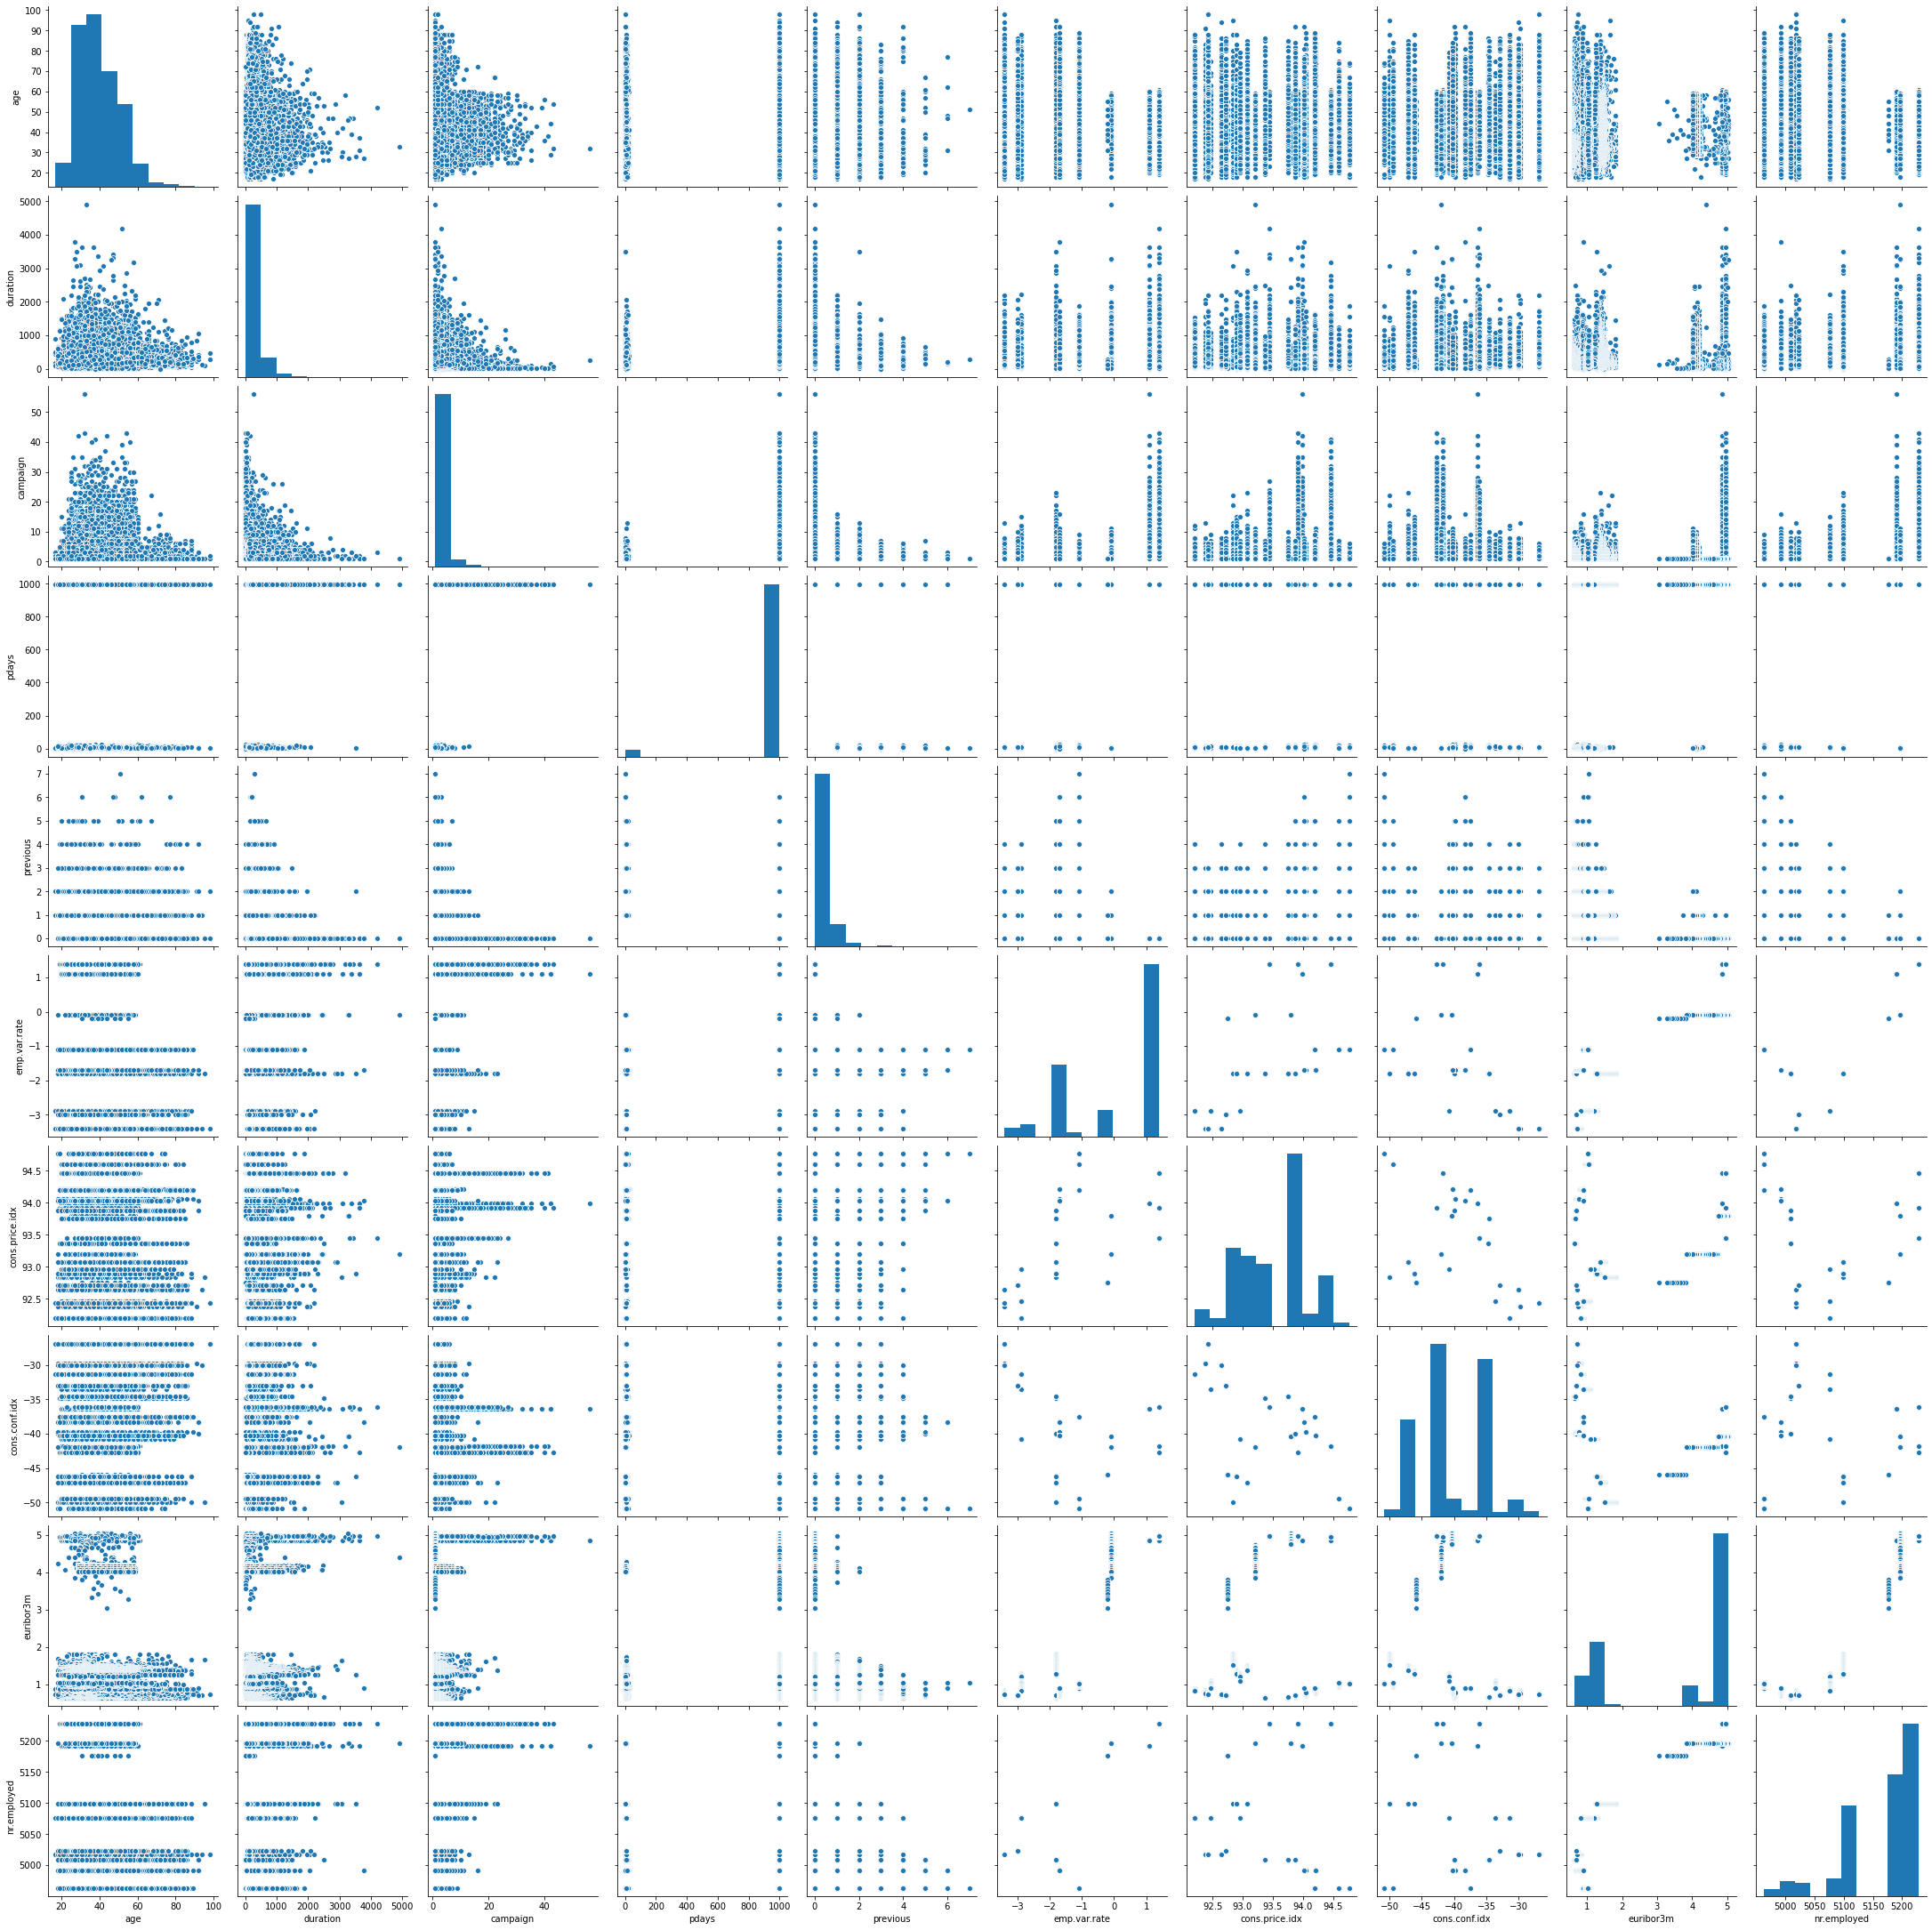

In [54]:
sns.pairplot(data, height= 3)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


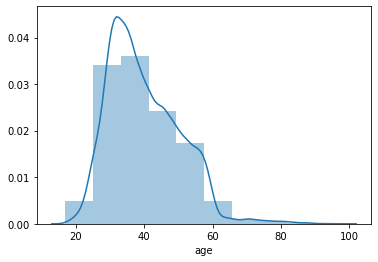

In [55]:
#We will plot the age column now
print(data.age.describe())
sns.distplot(data['age'], bins=10)

Maximum people belong from the range 27 to 47. There is a very small difference between mean and median.So the data is little bit skewe, but that is not much of concern

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


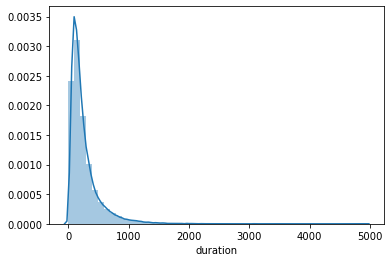

In [56]:
#duration
print(data.duration.describe())
sns.distplot(data['duration'])

The maximum number of call duration was between 0 to 500 seconds after that the graph drops at a sudden rate. The minimum value is 0 and maximum value is 4918. There is very big gap between 75th percentile and maximum value and there is big difference between mean and meidan as well. The datai is highly skewed and thus results in outliers.

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


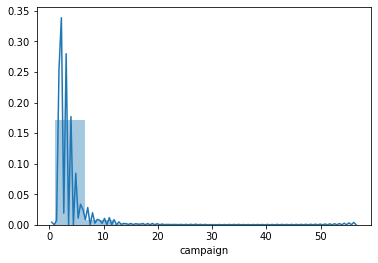

In [57]:
#campaign
print(data.campaign.describe())
sns.distplot(data.campaign, bins=10)

The maximum frequency is from 0 to 7. There is a slight difference between mean and median. But the difference between maximum value and 75 percentile is very high. This indicates the skewness is data is high and therefore needs a treatement. 

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


C:\Users\mishr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


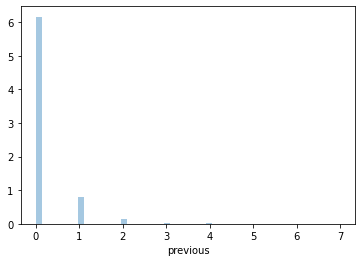

In [58]:
#previous
print(data.previous.describe())
sns.distplot(data.previous)

We can see that the maximum number of people have not been contacted ever before this campaign. There are very few people with whom the have made contact before this campaign.

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


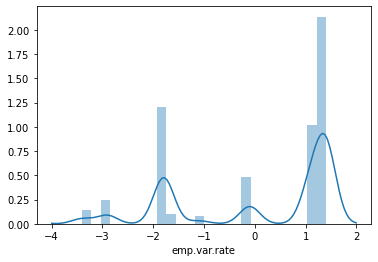

In [59]:
#emp.var.rate
print(data['emp.var.rate'].describe())
sns.distplot(data['emp.var.rate'])

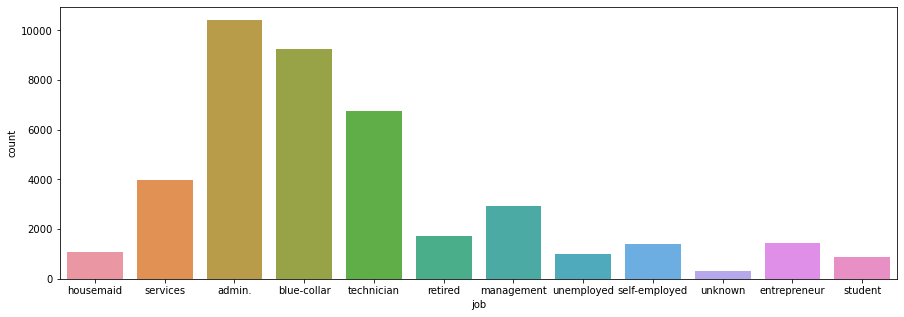

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(data['job'])

The maximum number of people with whom company has made contact was of admin job type and least was of unknown.

In [61]:
pd.crosstab(index=data['job'],columns=data['y'], margins=True, normalize=True)

y,no,yes,All
job,,,
admin.,0.220210,0.032825,0.253035
blue-collar,0.209187,0.015490,0.224677
entrepreneur,0.032340,0.003011,0.035350
housemaid,0.023162,0.002574,0.025736
management,0.063028,0.007963,0.070992
retired,0.031223,0.010537,0.041760
self-employed,0.030883,0.003618,0.034500
services,0.088521,0.007842,0.096363
student,0.014567,0.006677,0.021244


From the admin category 3.2% people have given a positive response and rest of them has given less than that. Overall category the positive response wa just 11% and rest was negative. 

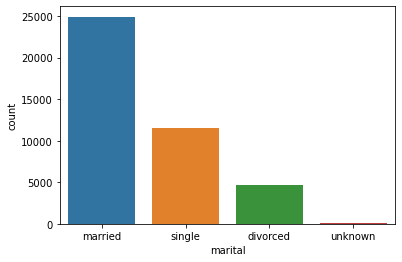

In [62]:
#marital
sns.countplot(data['marital'])

The company made contact with married people mostly. There are very few people who has not told their marital status.

In [63]:
pd.crosstab(index=data['marital'], columns=data['y'],margins=True, normalize=True)

y,no,yes,All
marital,,,
divorced,0.100418,0.011557,0.111974
married,0.543751,0.061474,0.605225
single,0.241527,0.039332,0.280859
unknown,0.001651,0.000291,0.001942
All,0.887346,0.112654,1.000000


More then 60 percent people whom contact was made are among married categorya and among these 6 percent people who gave positive response are married and 3 pecent single people gave positive response

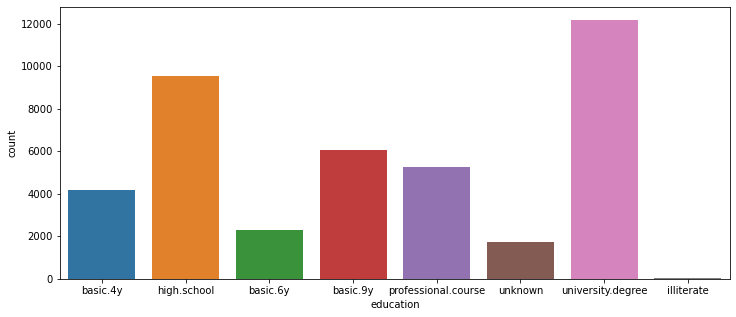

In [64]:
#education
plt.figure(figsize=(12,5))
sns.countplot(data['education'])

The maximum count was of unversity.degree person and the least was of illiterate persons. The number of people who has completed basic4year education was higher then the basic 6 year education.

In [65]:
pd.crosstab(index=data['education'], columns=data['y'],margins=True, normalize=True)

y,no,yes,All
education,,,
basic.4y,0.090997,0.010391,0.101389
basic.6y,0.051083,0.004564,0.055647
basic.9y,0.135282,0.011484,0.146766
high.school,0.205982,0.025032,0.231014
illiterate,0.000340,0.000097,0.000437
professional.course,0.112848,0.014446,0.127294
university.degree,0.254880,0.040546,0.295426
unknown,0.035933,0.006094,0.042027
All,0.887346,0.112654,1.000000


From positive response 4% people were of university degree, 2% were from high school category.

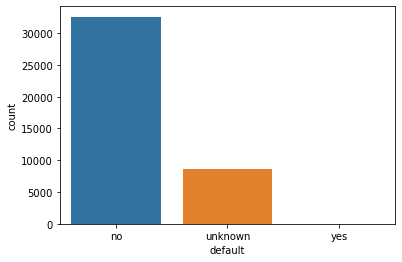

In [66]:
#defult
sns.countplot(data['default'])


There were more than 30000 customers who don't have any credit by default and some of them haven't revealed that whether they have any credit or not. There were very few who were having credit. 

In [67]:
pd.crosstab(index=data['default'], columns=data['y'], margins=True, normalize=True)

y,no,yes,All
default,,,
no,0.689303,0.101899,0.791201
unknown,0.197970,0.010756,0.208726
yes,0.000073,0.000000,0.000073
All,0.887346,0.112654,1.000000


None of the people who has credit have responded positively. Approximately 80% people were not having any credit. aming them 10% responded postively and rest negative

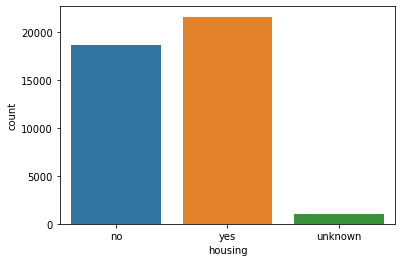

In [68]:
#housing
sns.countplot(data['housing'])

The number of people who are having house loan is maximum and unknown are very few.

In [69]:
pd.crosstab(index=data['housing'],columns=data['y'], margins=True, normalize=True)

y,no,yes,All
housing,,,
no,0.402933,0.049189,0.452122
unknown,0.021438,0.002598,0.024036
yes,0.462975,0.060867,0.523842
All,0.887346,0.112654,1.000000


Around 52% of people were having house loan out of them 6% have responded positive and rest of them have responded negative. There were around 45% of people who were contacted and 5% of them responded positive.

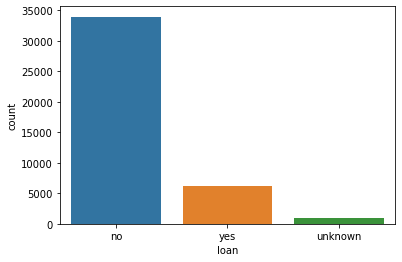

In [70]:
#loan
sns.countplot(data['loan'])

Almost 34000 people were not having any sort of personal loan. There were few who were having personal loan and very few about them we dont have any information.

In [71]:
pd.crosstab(data['loan'], data['y'], margins=True, normalize=True)

y,no,yes,All
loan,,,
no,0.730795,0.093474,0.824269
unknown,0.021438,0.002598,0.024036
yes,0.135112,0.016582,0.151695
All,0.887346,0.112654,1.000000


82% people were not having personal loan out of them 9% responded positive and rest negative.
15% people having personal loan out of which 1.5% responded positive and rest negative.

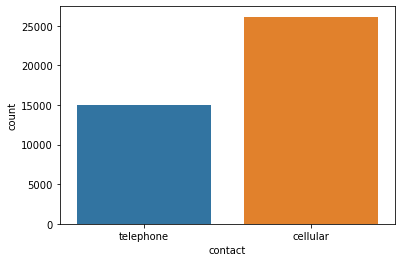

In [72]:
#contact
sns.countplot(data['contact'])

Most of the people were contacted using celluar method.

In [73]:
pd.crosstab(index=data['contact'], columns=data['y'], margins=True, normalize=True)

y,no,yes,All
contact,,,
cellular,0.541201,0.093547,0.634748
telephone,0.346145,0.019108,0.365252
All,0.887346,0.112654,1.000000


There were around 63% people with whom contact was made through cellular mode and 9% of them gave a positive response and among telephone mode only 25 gave posiitve response.

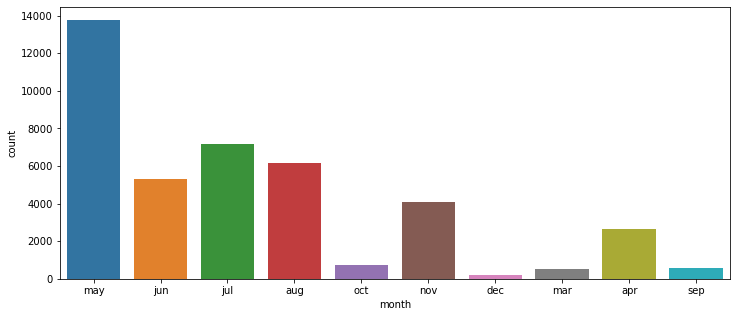

In [74]:
#month
plt.figure(figsize=(12,5))
sns.countplot(data['month'])

Maximum contact were made in month of May least were made in month of dec. 

In [75]:
pd.crosstab(index=data['month'], columns=data['y'], margins=True, normalize=True)

y,no,yes,All
month,,,
apr,0.050816,0.013086,0.063902
aug,0.134092,0.015903,0.149995
dec,0.002258,0.002161,0.004419
jul,0.158420,0.015757,0.174177
jun,0.115543,0.013572,0.129115
mar,0.006555,0.006701,0.013256
may,0.312785,0.021511,0.334296
nov,0.089468,0.010100,0.099568
oct,0.009784,0.007648,0.017432


There were 6.4% people with whom contact was made in month of the april and 1.3% of them responded positive. There were 1.7% people with whom company made contact in the month of october and 0.7% of them responded positive. 

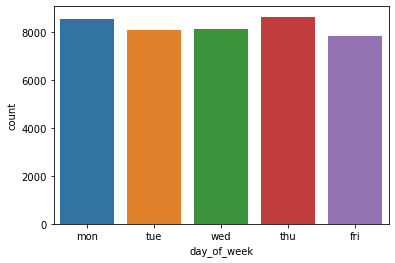

In [76]:
#day_of_week
sns.countplot(data['day_of_week'])

There was not much variation in this variable.

In [77]:
pd.crosstab(index=data['day_of_week'], columns=data['y'], margins=True, normalize=True)

y,no,yes,All
day_of_week,,,
fri,0.169491,0.020540,0.190031
mon,0.186146,0.020564,0.206711
thu,0.183986,0.025371,0.209357
tue,0.173279,0.023138,0.196416
wed,0.174444,0.023041,0.197485
All,0.887346,0.112654,1.000000


This variable also doesn't differ on basis of positive and negative response

In [78]:
#We can remove this variable if this doesnt have much of difference.

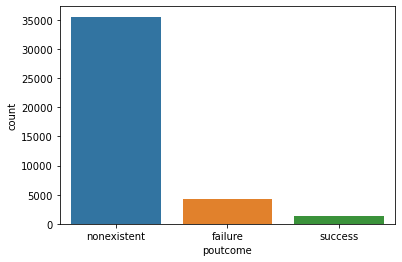

In [79]:
#poutcome
sns.countplot(data['poutcome'])

In [80]:
#Now we will convert the target variable into the numerical format
data['y'] = np.where(data['y']=='no',0,1)

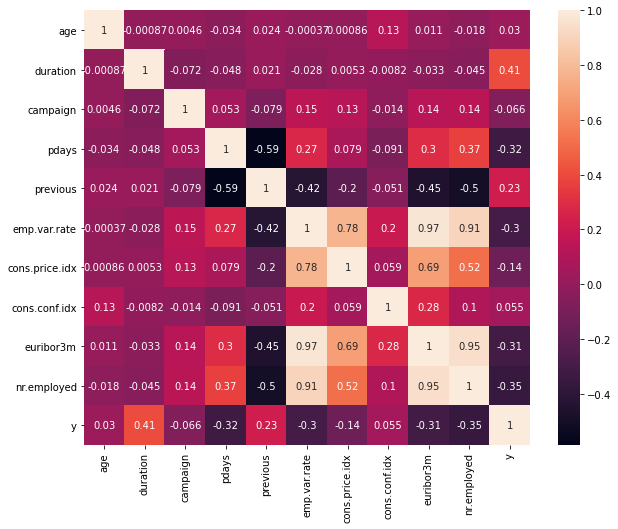

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [82]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


There are three variables 
1. emp.var.rate
2. euribor3m
3. nr.employed

These are highly correlated among themselves

In [83]:
#Now we will remove day_of_week
data = data.drop(['day_of_week','emp.var.rate','nr.employed'],axis=1)

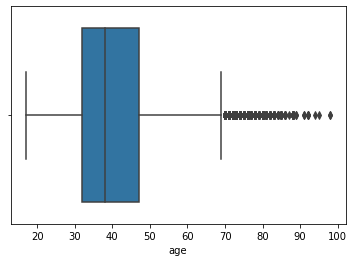

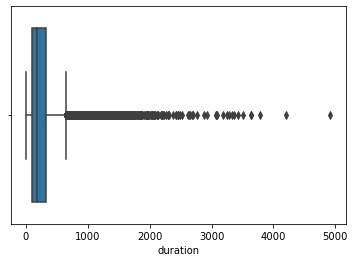

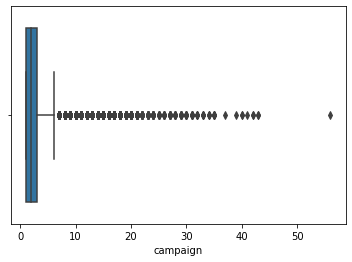

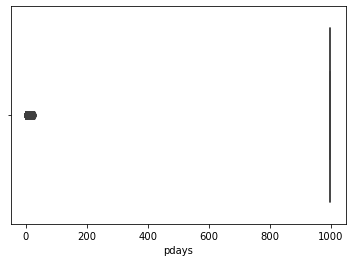

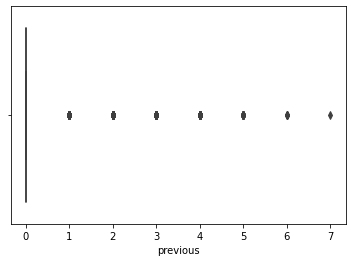

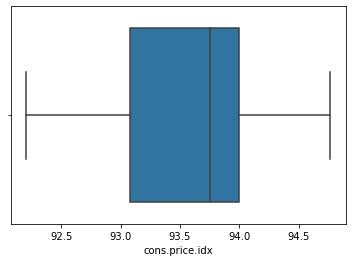

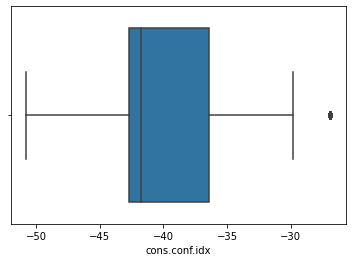

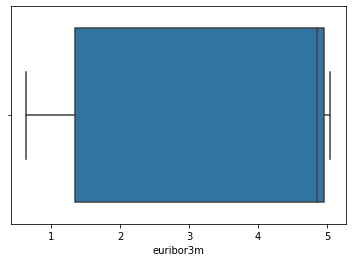

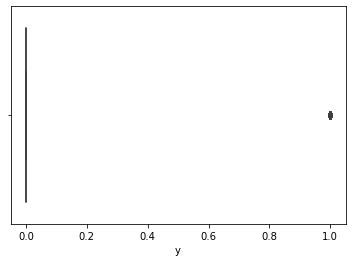

In [84]:
for i in data.columns:
    if data[i].dtypes != "O":
        sns.boxplot(data[i])
        plt.show()

There are some variables which we need to handle 
1. age
2. duration
3. campaign

In [85]:
#We can use Flooring and Capping on these variables
lower = data.age.quantile(0.10)
upper = data.age.quantile(0.90)
print(lower,upper)

28.0 55.0


In [86]:
data['age'] = np.where(data['age']>55, 55, data['age'])

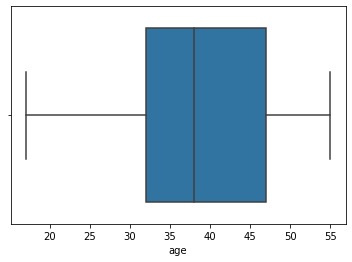

In [87]:
#We will cross-verify the outliers using boxplot
sns.boxplot(data['age'])

In [88]:
lower = data.duration.quantile(0.10)
upper = data.duration.quantile(0.90)
print(lower,upper)

59.0 551.0


In [89]:
data['duration'] = np.where(data['duration']>551, 551, data['duration'])

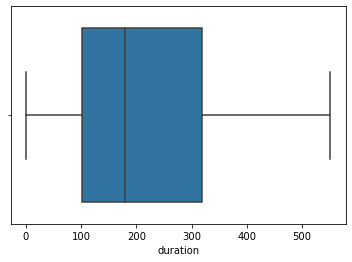

In [90]:
#We will cross verify these vriables 
sns.boxplot(data['duration'])

In [91]:
upper = data.campaign.quantile(0.90)
print(upper)

5.0


In [92]:
data['campaign'] = np.where(data['campaign']>5,5,data['campaign'])

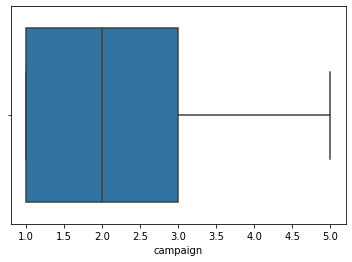

In [93]:
#We will cross-verify the outliers using boxplot
sns.boxplot(data['campaign'])

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
num_var = data.select_dtypes(exclude="O")
num_var = num_var.drop('y',axis=1)

In [96]:
num_var.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,55,261,1,999,0,93.994,-36.4,4.857
1,55,149,1,999,0,93.994,-36.4,4.857
2,37,226,1,999,0,93.994,-36.4,4.857
3,40,151,1,999,0,93.994,-36.4,4.857
4,55,307,1,999,0,93.994,-36.4,4.857


In [97]:
scaler = StandardScaler()

In [98]:
num_var = scaler.fit_transform(num_var)

In [99]:
num_var = pd.DataFrame(num_var, columns=['age','duration','campaign','pdays','previous',
                                        'cons.price.idx','cons.conf.idx','euribor3m'])
num_var.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.677006,0.212175,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
1,1.677006,-0.487215,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
2,-0.271098,-0.006384,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
3,0.053586,-0.474726,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
4,1.677006,0.499424,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246


In [100]:
data.drop(['age','duration','campaign','pdays','previous',
                                        'cons.price.idx','cons.conf.idx','euribor3m'],axis=1, inplace=True)

In [101]:
data = pd.concat([data,num_var],axis=1)

In [102]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent,0,1.677006,0.212175,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
1,services,married,high.school,unknown,no,no,telephone,may,nonexistent,0,1.677006,-0.487215,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
2,services,married,high.school,no,yes,no,telephone,may,nonexistent,0,-0.271098,-0.006384,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
3,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent,0,0.053586,-0.474726,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246
4,services,married,high.school,no,no,yes,telephone,may,nonexistent,0,1.677006,0.499424,-0.873122,0.195414,-0.349494,0.722722,0.886447,0.71246


In [103]:
#Creating dummy variables
data= pd.get_dummies(data, drop_first=True)

In [104]:
#Seprating the dependent and independent variables
X = data.drop('y', axis=1)
y = data['y']

In [105]:
#We will now split the train and test dataset
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1) 

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 47), (8238, 47), (32950,), (8238,))

## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
pred = dt.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score,auc

In [112]:
print(confusion_matrix(y_test,pred))
print("----------------------------------------")
print(accuracy_score(y_test,pred))
print("----------------------------------------")
print(classification_report(y_test,pred))
print("----------------------------------------")
print(f1_score(y_test,pred))
print("----------------------------------------")

[[6795  499]
 [ 471  473]]
----------------------------------------
0.8822529740228211
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7294
           1       0.49      0.50      0.49       944

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.88      0.88      0.88      8238

----------------------------------------
0.4937369519832986
----------------------------------------


We have a good accuracy but still we need to work more as false negative values are very high

## RandomForest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
pred = rf.predict(X_test)

In [116]:
print(confusion_matrix(y_test,pred))
print("----------------------------------------")
print(accuracy_score(y_test,pred))
print("----------------------------------------")
print(classification_report(y_test,pred))
print("----------------------------------------")
print(f1_score(y_test,pred))
print("----------------------------------------")

[[7050  244]
 [ 516  428]]
----------------------------------------
0.9077445982034474
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.64      0.45      0.53       944

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

----------------------------------------
0.5297029702970298
----------------------------------------


By using Random Forest we have slightly improved the false negative rate. 

## RandomSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
#Number of Decison trees in the Random Forest
n_estimator = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
#number of features to consider at every split
max_feature = ['auto','sqrt','log2']
#max number of levels in  the tree
max_depth =  [int(x) for x in np.linspace(10, 100,10)]
#minimum  number of samples required to split a node
min_sample_split = [1,2,3,4,5,6,7]
#minimum number of samples required at each node
min_sample_leaf = [1,2,3,4]
#Criterion
criteria = ['entropy','gini']
#Creating random grid
random_grid={'n_estimators':n_estimator,
            'max_features':max_feature,
            'max_depth': max_depth,
            'min_samples_split':min_sample_split,
            'min_samples_leaf':min_sample_leaf,
            'criterion':criteria}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4], 'criterion': ['entropy', 'gini']}


### Random Forest

In [119]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, param_distributions=random_grid,n_iter=20,cv =3,n_jobs=-1, random_state=1)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=1)

In [120]:
pred = rf_random.predict(X_test)

In [121]:
print(confusion_matrix(y_test,pred))
print("----------------------------------------")
print(accuracy_score(y_test,pred))
print("----------------------------------------")
print(classification_report(y_test,pred))
print("----------------------------------------")
print(f1_score(y_test,pred))
print("----------------------------------------")

[[7081  213]
 [ 529  415]]
----------------------------------------
0.9099295945617868
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.66      0.44      0.53       944

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

----------------------------------------
0.5279898218829516
----------------------------------------


### Decision Tree

In [122]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [123]:
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(dt,param_distributions= params,n_iter=20,random_state=0)
dt_random.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   random_state=0)

In [124]:
pred = dt_random.predict(X_test)

In [125]:
print(confusion_matrix(y_test,pred))
print("----------------------------------------")
print(accuracy_score(y_test,pred))
print("----------------------------------------")
print(classification_report(y_test,pred))
print("----------------------------------------")
print(f1_score(y_test,pred))
print("----------------------------------------")

[[7069  225]
 [ 553  391]]
----------------------------------------
0.9055596018451081
----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.63      0.41      0.50       944

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238

----------------------------------------
0.5012820512820513
----------------------------------------
